# The Simple Version

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier



nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

np.random.seed(500)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Import Dataset and take a Quick Look

In [2]:
url = "https://raw.githubusercontent.com/henrywan910/Machine-Learning/main/train.csv"
df = pd.read_csv(url)
df.head()


,tweets,labels
0,sending solidarity whoever doctor manage incre...,Stressed
1,need see hair amp beard gat book appointment b...,Anxious
2,next time meet someone new dont ask ask love,Normal
3,surprise someone love give la senza gift box r...,Lonely
4,raise hand junhoes ocean lotion life rent free...,Normal


In [ ]:
df["labels"].value_counts()

Anxious     8388
Normal      7976
Stressed    6840
Lonely      6788
Name: labels, dtype: int64

In [ ]:
df["tweets"].value_counts()

human need job cant exist amp make art chill cat                                             352
sad thing disinformation truth come damage already people already mi                         334
sad newscloris insanely talented could make laugh cry drop hat always pleasure               267
feel like im start scratch every aspect life kinda sad kinda powerful kinda necessary        262
advisor tell instead try game market need put money 1 tall bank shape li                     235
                                                                                            ... 
petty self anymore im tire try reach help im gonna give sinc                                   1
carrano perfectly capable get anonymous twitterig account share noxious opinion choose n       1
literally iconic                                                                               1
im tire patient                                                                                1
even tonight youre go bed date

In [ ]:
df['labels']=df['labels'].apply(lambda x: 'Normal' if x == 'Normal' else 'Alert')
df=df.drop_duplicates("tweets")

In [ ]:
df['labels'].value_counts()

Alert     8823
Normal    7335
Name: labels, dtype: int64

In [ ]:
print(f"Alert % is {df['labels'].value_counts()[0]/len(df)*100 :.2f}")
print(f"Normal % is {df['labels'].value_counts()[1]/len(df)*100 :.2f}")

Alert % is 54.60
Normal % is 45.40


Sample Sampling

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df['tweets'],df['labels'],test_size=0.2)
y_train = y_train.map({'Normal': 0, 'Alert': 1})
y_test = y_test.map({'Normal': 0, 'Alert': 1})

In [ ]:
class TweetToWordTransformer(BaseEstimator,TransformerMixin):
  def __init__(self, dropna=True, lower_case=True, tokenize=True):
    self.dropna = dropna
    self.lower_case = lower_case
    self.tokenize = tokenize
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    if self.dropna:
      X.dropna(inplace=True)
    if self.lower_case:
      X = [entry.lower() for entry in X]
    if self.tokenize:
      X = [word_tokenize(entry) for entry in X]
    
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    X_transformed = []
    for index,entry in enumerate(X):
        # Declaring Empty List to store the words that follow the rules for this step
        Final_words = []
        # Initializing WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(entry):
            # Below condition is to check for Stop words and consider only alphabets
            if word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
        # The final processed set of words for each iteration will be stored in 'text_final'
        X_transformed.append(str(Final_words))
      
    return np.array(X_transformed)


preprocess_pipeline = Pipeline([
    ("tweet_to_word", TweetToWordTransformer()),
    ("word_to_vector", TfidfVectorizer(max_features=50000)),
])


In [ ]:
X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [ ]:
def performance_of_trainset(model):
  """
  print the confusion matrix of train set from the inputted model
  return (y_train_pred_model, confmx_train_model, report_model)
  """
  y_train_pred_model = cross_val_predict(model, X_train_transformed, y_train, cv=10)
  confmx_train_model = confusion_matrix(y_train, y_train_pred_model)
  report_model = classification_report(y_train, y_train_pred_model, digits=3) 
  
  disp = ConfusionMatrixDisplay(confusion_matrix=confmx_train_model)
  disp.plot()
  plt.show()
  print("\n", report_model)

  return (y_train_pred_model, confmx_train_model,report_model)


SGD

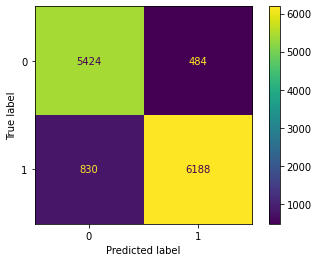


               precision    recall  f1-score   support

           0      0.867     0.918     0.892      5908
           1      0.927     0.882     0.904      7018

    accuracy                          0.898     12926
   macro avg      0.897     0.900     0.898     12926
weighted avg      0.900     0.898     0.899     12926



In [ ]:

# Classifier - Algorithm - SGD

SGD = SGDClassifier()
y_train_pred_SGD, confmx_train_SGD, report_SGD= performance_of_trainset(SGD)

In [ ]:
SGD.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

grid search (maximize the ROC_AUC) (DONT LOAD IT)

In [ ]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
eta0 = [0, 1, 10, 100, 1000] 
param_distributions = dict(loss=loss,
                           penalty=penalty, 
                           alpha=alpha,
                           eta0=eta0,
                           learning_rate=learning_rate 
                           ) 

grid_SGD = GridSearchCV(estimator=SGD, param_grid=param_distributions, verbose=1, n_jobs=-1, scoring="f1") 
grid_SGD_result = grid_SGD.fit(X_train_transformed, y_train) 
print('Best Score: ', grid_SGD_result.best_score_) 
print('Best Params: ', grid_SGD_result.best_params_) 

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


KeyboardInterrupt: ignored

recall / precision

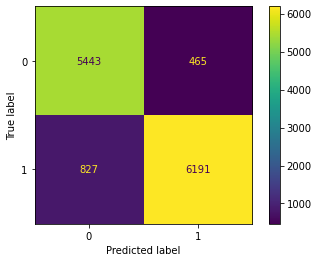


               precision    recall  f1-score   support

           0      0.868     0.921     0.894      5908
           1      0.930     0.882     0.906      7018

    accuracy                          0.900     12926
   macro avg      0.899     0.902     0.900     12926
weighted avg      0.902     0.900     0.900     12926



In [ ]:
SGD_modified = SGDClassifier(penalty="elasticnet", loss="hinge", learning_rate='optimal', eta0=1000 ,alpha= 0.0001)
y_train_pred_SGD_modified, confmx_train_SGD_modified, report_SGD_modified= performance_of_trainset(SGD_modified)

In [ ]:
y_scores = cross_val_predict(SGD_modified, X_train_transformed, y_train, cv=3,
                             method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [ ]:
min(thresholds), max(thresholds)

(-1.6301509504584675, 13.346218131502509)

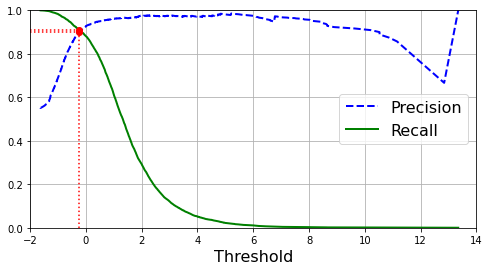

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-2, 14, 0, 1])             


recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-2, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-2, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             

plt.show()

In [ ]:
threshold_90_precision

-0.23698520658832

In [ ]:
threshold_90_recall = thresholds[np.argmin(recalls >= 0.90)]

In [ ]:
threshold_90_recall

-0.14158126019161354

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
confmx_train_model = confusion_matrix(y_train, y_train_pred_90)
confmx_train_model
print(classification_report(y_train, y_train_pred_90, digits=3))


              precision    recall  f1-score   support

           0      1.000     0.032     0.062      5908
           1      0.551     1.000     0.710      7018

    accuracy                          0.557     12926
   macro avg      0.775     0.516     0.386     12926
weighted avg      0.756     0.557     0.414     12926



In [ ]:
y_train_pred_90recall = (y_scores >= threshold_90_recall)
confmx_train_model = confusion_matrix(y_train, y_train_pred_90recall)
confmx_train_model
print(classification_report(y_train, y_train_pred_90recall, digits=3))

              precision    recall  f1-score   support

           0      0.883     0.896     0.889      5908
           1      0.911     0.900     0.906      7018

    accuracy                          0.898     12926
   macro avg      0.897     0.898     0.897     12926
weighted avg      0.898     0.898     0.898     12926



In [ ]:
threshold_90_recall

-1.6301509504584675

NB

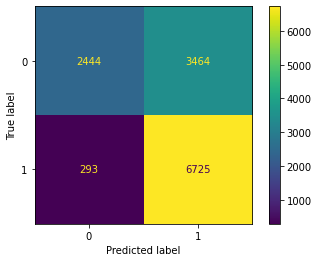


               precision    recall  f1-score   support

           0      0.893     0.414     0.565      5908
           1      0.660     0.958     0.782      7018

    accuracy                          0.709     12926
   macro avg      0.776     0.686     0.674     12926
weighted avg      0.766     0.709     0.683     12926



In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()

y_train_pred_NB, confmx_train_NB, report_NB =performance_of_trainset(Naive)

In [ ]:
Naive.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [ ]:
param_grid_nb = {
    'alpha': [0,0.01,0.001,0.0001,0.1,1,10],
    'fit_prior':[True,False]
}


grid_NB = GridSearchCV(estimator=Naive, param_grid=param_grid_nb, verbose=1, n_jobs=-1, scoring="f1") 
grid_NB_result = grid_NB.fit(X_train_transformed, y_train) 
print('Best Score: ', grid_NB_result.best_score_) 
print('Best Params: ', grid_NB_result.best_params_) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Score:  0.7965137422010543
Best Params:  {'alpha': 1, 'fit_prior': False}


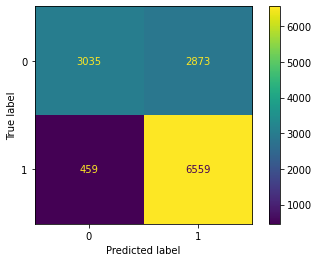


               precision    recall  f1-score   support

           0      0.869     0.514     0.646      5908
           1      0.695     0.935     0.797      7018

    accuracy                          0.742     12926
   macro avg      0.782     0.724     0.722     12926
weighted avg      0.775     0.742     0.728     12926



In [ ]:
Naive_modified = naive_bayes.MultinomialNB(alpha=1, fit_prior=False)

y_train_pred_NB_modified, confmx_train_NB_modified, report_NB_modified =performance_of_trainset(Naive_modified)

SVM

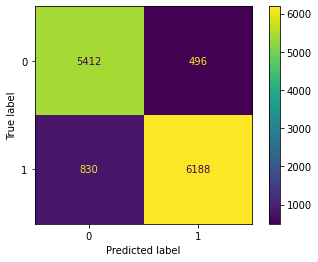


               precision    recall  f1-score   support

           0      0.867     0.916     0.891      5908
           1      0.926     0.882     0.903      7018

    accuracy                          0.897     12926
   macro avg      0.896     0.899     0.897     12926
weighted avg      0.899     0.897     0.898     12926



In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

y_train_pred_SVM, confmx_train_SVM, report_SVM =performance_of_trainset(SVM)

In [ ]:
SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

SVM has a good performance in recall!

In [ ]:
param_grid_SVM = {
    "C": [0.1,1,10],
    "degree": [2,3,4],
    "kernel" :["linear", "poly", "rbf", "sigmoid"],
    "gamma" :[0.01,0.05,0.1]
}

grid_SVM = GridSearchCV(estimator=SVM, param_grid=param_grid_SVM, verbose=1, n_jobs=-1,scoring='f1') 
grid_SVM_result = grid_SVM.fit(X_train_transformed, y_train) 
print('Best Score: ', grid_SVM_result.best_score_) 
print('Best Params: ', grid_SVM_result.best_params_) 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Score:  0.8981121677355077
Best Params:  {'C': 10, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}


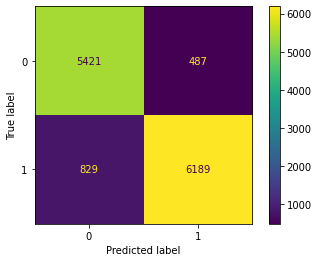


               precision    recall  f1-score   support

           0      0.867     0.918     0.892      5908
           1      0.927     0.882     0.904      7018

    accuracy                          0.898     12926
   macro avg      0.897     0.900     0.898     12926
weighted avg      0.900     0.898     0.898     12926



In [ ]:
SVM_modified = svm.SVC(C=10, kernel='rbf', gamma=0.05, degree=2)

y_train_pred_SVM_modified, confmx_train_SVM_modified, report_SVM_modified =performance_of_trainset(SVM_modified)

random forest

In [ ]:
forest = RandomForestClassifier()

forest_scores = cross_val_score(forest, X_train_transformed, y_train, cv=10)
forest_scores.mean()

y_train_pred_forest = cross_val_predict(forest, X_train_transformed, y_train, cv=3)
confmx_train_forest = confusion_matrix(y_train,y_train_pred_forest)

report_forest = classification_report(y_train, y_train_pred_forest, digits=3)

print(forest_scores.mean())
print(confmx_train_forest)
print(report_forest)

0.9107227174665201
[[5189  644]
 [ 587 6506]]
              precision    recall  f1-score   support

           0      0.898     0.890     0.894      5833
           1      0.910     0.917     0.914      7093

    accuracy                          0.905     12926
   macro avg      0.904     0.903     0.904     12926
weighted avg      0.905     0.905     0.905     12926



In [ ]:
forest = RandomForestClassifier()

run too long!

Logistic Regression


In [ ]:
# LogisticRegression
log_re = LogisticRegression(penalty='l2', dual=False, tol=0.0001,C=1,fit_intercept=True, intercept_scaling=1.0, class_weight=None, random_state=None)
log_re.fit(X_train_transformed, y_train)
y_pred_lr = log_re.predict(X_train_transformed)

# Use accuracy_score function to get the accuracy
#print("Logistic Regression Accuracy Score -> ",accuracy_score(y_pred_lr, y_train)*100,"%")
y_train_pred_lr, confmx_train_lr, report_lr= performance_of_trainset(log_re)

In [ ]:
#GridSearch on Logistic Regression

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,1,2,3,4,5,6]}


grid_LR = GridSearchCV(log_re, param_grid = grid_values,scoring = 'f1')
grid_LR_result = grid_LR.fit(X_train_transformed, y_train) 
print('Best Score: ', grid_LR_result.best_score_) 
print('Best Params: ', grid_LR_result.best_params_) 

NameError: ignored

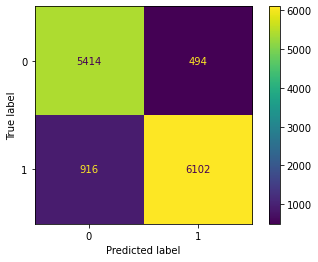


               precision    recall  f1-score   support

           0      0.855     0.916     0.885      5908
           1      0.925     0.869     0.896      7018

    accuracy                          0.891     12926
   macro avg      0.890     0.893     0.891     12926
weighted avg      0.893     0.891     0.891     12926



In [ ]:
log_re_modified = LogisticRegression(penalty='l2', dual=False, tol=0.0001,C=3,fit_intercept=True, intercept_scaling=1.0, class_weight=None, random_state=None)
y_train_pred_lr_modified, confmx_train_lr_modified, report_lr_modified = performance_of_trainset(log_re_modified)

Decsion Tree

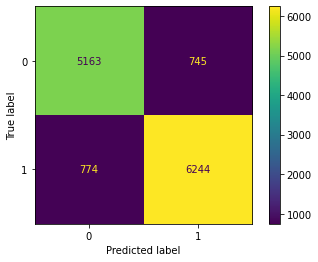

              precision    recall  f1-score   support

           0      0.870     0.874     0.872      5908
           1      0.893     0.890     0.892      7018

    accuracy                          0.882     12926
   macro avg      0.882     0.882     0.882     12926
weighted avg      0.883     0.882     0.883     12926



In [ ]:
#Decison Tree
model_dt = DecisionTreeClassifier()

y_train_pred_dt, confmx_train_dt, report_dt= performance_of_trainset(model_dt)

In [ ]:
#Grid Search on DT

model_dt = DecisionTreeClassifier()

grid_values = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 16)}


grid_DT = GridSearchCV(model_dt, param_grid = grid_values,scoring = 'f1')
grid_DT_result = grid_DT.fit(X_train_transformed, y_train) 
print('Best Score: ', grid_DT_result.best_score_) 
print('Best Params: ', grid_DT_result.best_params_) 

Best Score:  0.8821607341208196
Best Params:  {'criterion': 'entropy', 'max_depth': 14}


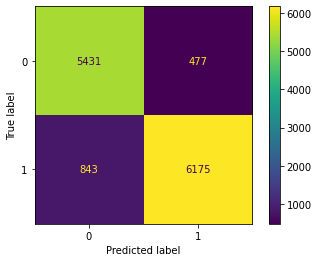


               precision    recall  f1-score   support

           0      0.866     0.919     0.892      5908
           1      0.928     0.880     0.903      7018

    accuracy                          0.898     12926
   macro avg      0.897     0.900     0.898     12926
weighted avg      0.900     0.898     0.898     12926



In [ ]:
model_dt_modified = DecisionTreeClassifier( criterion = 'entropy', max_depth = 14)

y_train_pred_dt_modified, confmx_train_dt_modified, report_dt_modified= performance_of_trainset(model_dt_modified)

ADA BOOST

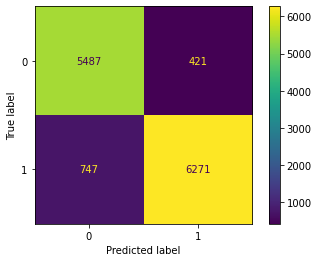


               precision    recall  f1-score   support

           0      0.880     0.929     0.904      5908
           1      0.937     0.894     0.915      7018

    accuracy                          0.910     12926
   macro avg      0.909     0.911     0.909     12926
weighted avg      0.911     0.910     0.910     12926



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ADA = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
y_train_pred_ADA, confmx_train_ADA, report_ADA= performance_of_trainset(ADA)

Voting model

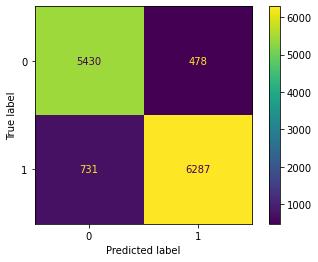


               precision    recall  f1-score   support

           0      0.881     0.919     0.900      5908
           1      0.929     0.896     0.912      7018

    accuracy                          0.906     12926
   macro avg      0.905     0.907     0.906     12926
weighted avg      0.907     0.906     0.907     12926



In [ ]:
VOTE = VotingClassifier(
    estimators=[
        ('svm', SVM_modified), 
        ('naive', Naive_modified), 
        ('SGD', SGD_modified),
        ('forest', forest),
        ('log', log_re_modified),
        ('decisiontree',model_dt_modified),
        ("ADA", ADA)],        
        voting='hard')

y_train_pred_VOTE, confmx_train_VOTE, report_VOTE =performance_of_trainset(VOTE)


In [ ]:
X_test_transformed = preprocess_pipeline.transform(X_test)

modellist = (SVM_modified, Naive_modified,SGD_modified, forest, log_re_modified, model_dt_modified, ADA, VOTE)
for clf in modellist:
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.9090346534653465
MultinomialNB 0.7215346534653465
SGDClassifier 0.9077970297029703
RandomForestClassifier 0.9127475247524752
LogisticRegression 0.8963490099009901
DecisionTreeClassifier 0.900990099009901
AdaBoostClassifier 0.9146039603960396
VotingClassifier 0.9146039603960396


In [ ]:
VOTE_fast = VotingClassifier(
    estimators=[
        ('svm', SVM_modified), 
        ('SGD', SGD_modified),
        ('log', log_re_modified),
        ('decisiontree',model_dt_modified)],        
        voting='hard')

In [ ]:
modellist = (SVM_modified,SGD_modified, log_re_modified, model_dt_modified, VOTE_fast)
for clf in modellist:
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.9090346534653465
SGDClassifier 0.9074876237623762
LogisticRegression 0.8963490099009901
DecisionTreeClassifier 0.8991336633663366
VotingClassifier 0.9093440594059405


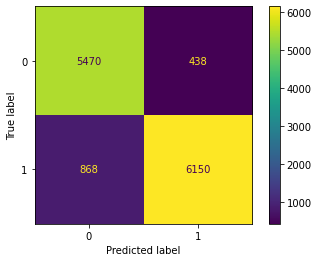


               precision    recall  f1-score   support

           0      0.863     0.926     0.893      5908
           1      0.934     0.876     0.904      7018

    accuracy                          0.899     12926
   macro avg      0.898     0.901     0.899     12926
weighted avg      0.901     0.899     0.899     12926



In [ ]:
y_train_pred_VOTE, confmx_train_VOTE, report_VOTE =performance_of_trainset(VOTE_fast)

In [ ]:
del VOTE.estimators_[1]

In [ ]:
VOTE.estimators_

[SVC(C=10, degree=2, gamma=0.05),
 SGDClassifier(eta0=1000, penalty='elasticnet'),
 RandomForestClassifier(),
 LogisticRegression(C=3, intercept_scaling=1.0),
 DecisionTreeClassifier(criterion='entropy', max_depth=14)]

In [ ]:
modellist = (SVM_modified, Naive_modified,SGD_modified, forest, log_re_modified, model_dt_modified, VOTE)
for clf in modellist:
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.9090346534653465
MultinomialNB 0.7215346534653465
SGDClassifier 0.9090346534653465
RandomForestClassifier 0.9164603960396039
LogisticRegression 0.8963490099009901
DecisionTreeClassifier 0.900680693069307
VotingClassifier 0.911819306930693


In [ ]:
VOTE.estimators_[1]

[SVC(C=10, degree=2, gamma=0.05),
 MultinomialNB(alpha=1, fit_prior=False),
 SGDClassifier(eta0=1000, penalty='elasticnet'),
 RandomForestClassifier(),
 LogisticRegression(C=3, intercept_scaling=1.0),
 DecisionTreeClassifier(criterion='entropy', max_depth=14)]

In [ ]:
del VOTE.estimators_[4]

In [ ]:
VOTE.estimators_

[SVC(C=10, degree=2, gamma=0.05),
 MultinomialNB(alpha=1, fit_prior=False),
 SGDClassifier(eta0=1000, penalty='elasticnet'),
 RandomForestClassifier(),
 DecisionTreeClassifier(criterion='entropy', max_depth=14)]

In [ ]:
modellist = (SVM_modified, SGD_modified, forest, model_dt_modified, VOTE)
for clf in modellist:
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.9090346534653465
SGDClassifier 0.9068688118811881
RandomForestClassifier 0.9139851485148515
DecisionTreeClassifier 0.9000618811881188
VotingClassifier 0.9127475247524752


In [ ]:
del VOTE.estimators_[1]

In [ ]:
del VOTE.estimators_[3]

In [ ]:
VOTE.estimators_

[SVC(C=10, degree=2, gamma=0.05),
 SGDClassifier(eta0=1000, penalty='elasticnet'),
 RandomForestClassifier(),
 DecisionTreeClassifier(criterion='entropy', max_depth=14)]

In [ ]:
modellist = (SVM_modified, SGD_modified, forest, model_dt_modified, VOTE)
for clf in modellist:
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.9090346534653465
SGDClassifier 0.9074876237623762
RandomForestClassifier 0.9149133663366337
DecisionTreeClassifier 0.8988242574257426
VotingClassifier 0.911200495049505


### FINAL MODEL

In [ ]:
final_model = Pipeline([
        ("preparation", preprocess_pipeline),
        ("model", VOTE_fast)
    ])

final_model.fit(X_train, y_train)
y_pred = clf.predict(X_test_transformed)
accuracy_score(y_test, y_pred)

0.9087252475247525

In [ ]:
# Export our first model

import joblib
joblib.dump(final_model, "my_model.joblib") 


['my_model.joblib']

In [ ]:
my_model_loaded = joblib.load("my_model.joblib") 


In [ ]:
tweet = pd.Series(input("Please write down your recent tweets."))

print("Normal") if my_model_loaded.predict(tweet)==0 else print("Alert")

Please write down your recent tweets.he died
Normal
